<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/HW/william-dove/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3: Sensor Data Analysis with phyphox and Python

##1. Experimental Setup


For my experiment I chose to measure the acceleration due to gravity by rolling an object down an incline. I did this using my phone's gyroscope and the app phyphox for data collection. I used two rolls of tape and a bit of paper to construct a tube, put my phone inside of it and let it roll down a ramp.

###Parameters
$$ I_{tape}= \frac{1}{2} m (R^2 + r^2) $$
$$ I_{phone}= \frac{1}{12} m ([thickness]^2 + [width]^2) $$




*   Tape roll inner radius r: 7.6 cm
*   Tape roll outer radius R: 11.7 cm
*   Tape roll mass: 50 g
*   Phone thickness: 1.0 cm
*   Phone width: 7.4 cm
*   Phone mass: 200 g
  * $I_{tape}=$ 4,866 g cm^2
  * $I_{phone}=$ 929 g cm^2
  * $I=$ 10,661 g cm^2

* Total radius: 11.7 cm
* Total mass: 300 g
* Incline angle (with respect to horizontal): 2$^\circ $



###Determining *g*

Newton's second law for rolling object:

$$ ma = mg \sin \theta - f$$

Where $f$ is the frictional force. For rolling without slipping:

$$ \tau = R \times f \rightarrow f = I \frac{\alpha}{R} $$

We know $ \alpha = \frac{d \omega}{d t} = \frac{a}{R} $.

We can now solve for $g$ :

$$g = \frac{m \alpha R+I \frac{\alpha}{R}}{m \sin \theta} $$




##2. Data Analysis with Pandas and NumPy



First I can import the raw data csv. I can view the data as a Pandas dataframe. I plotted the rotational velocity along the y-axis vs time, as this is the axis along which the phone was rotating.

In [13]:
import pandas as pd
data_raw = pd.read_csv('Raw Data.csv', index_col=0)
data_raw

,Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Absolute (rad/s)
Time (s),,,,
0.002598,-0.000555,0.007852,0.001177,0.007959
0.012570,-0.000399,-0.002423,0.001730,0.003004
0.022542,-0.000086,-0.023121,-0.000694,0.023132
0.032515,0.000048,-0.046962,0.001249,0.046979
0.042487,-0.000837,-0.066054,-0.000218,0.066059
...,...,...,...,...
7.761131,0.183541,0.002904,-0.054700,0.191541
7.771104,0.217883,-0.054697,-0.056726,0.231695
7.781076,0.220877,-0.059387,-0.013706,0.229131


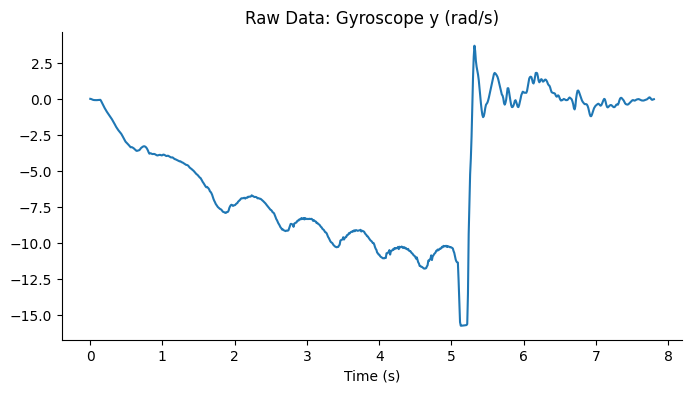

In [14]:
# Plot of raw Gyroscope y data:
from matplotlib import pyplot as plt
data_raw['Gyroscope y (rad/s)'].plot(kind='line', figsize=(8, 4), title='Raw Data: Gyroscope y (rad/s)')
plt.gca().spines[['top', 'right']].set_visible(False)

Using the dataframe and plot I can trim the beginning and end of the data as to only include data from when the actual experiment was running.

In [15]:
data_trimmed = data_raw[(data_raw.index < 5)]

##3. Model Fitting and Visualization:

I can use $\alpha = \frac{d \omega}{d t}$ to find the angular acceleration over time.

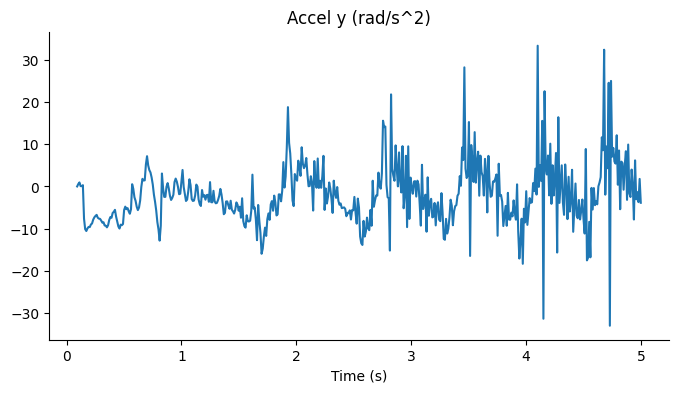

In [27]:
dt = data_trimmed.index.to_series().diff()

for axis in ['x', 'y', 'z']:
  data_trimmed.loc[:, f'Accel {axis} (rad/s^2)'] = data_trimmed[f'Gyroscope {axis} (rad/s)'].diff() / dt
  data_trimmed = data_trimmed.dropna()

data_trimmed['Accel y (rad/s^2)'].plot(kind='line', figsize=(8, 4), title='Accel y (rad/s^2)')
plt.gca().spines[['top', 'right']].set_visible(False)

This is a bit noisy, likely due to imperfections in the tube causing sudden jolts in the acceleration. I can also fit a physics model to the plot of angular velocity over time, which should look like a straight line due to constant acceleration.

Predicted value of alpha: -2.4
Predicted value of b: 0
Fitted value of alpha: -2.025
Fitted value of b: -2.172


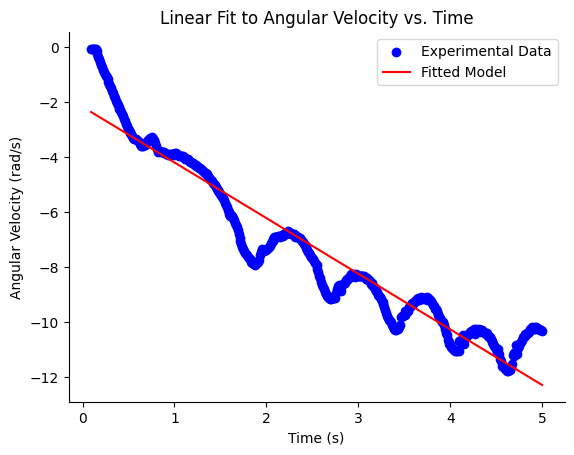

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Define the theoretical model
def model(t, alpha, b):
  return alpha*t + b

# Guess values for alpha and b
alpha_guess = -12/5
b_guess = 0
print(f'Predicted value of alpha: {alpha_guess}')
print(f'Predicted value of b: {b_guess}')

# Fit the model to the data, adjust alpha and b
popt, pcov = curve_fit(model, data_trimmed.index, data_trimmed['Gyroscope y (rad/s)'], p0=[alpha_guess, b_guess])
alpha_fit, b_fit = popt # Sets s and b to the optimal parameters popt.
print(f'Fitted value of alpha: {alpha_fit:.3f}')
print(f'Fitted value of b: {b_fit:.3f}')
gyroscope_fit = model(data_trimmed.index, alpha_fit, b_fit)

# Plot the data and fit
plt.scatter(data_trimmed.index, data_trimmed['Gyroscope y (rad/s)'], label="Experimental Data", color="blue")
plt.plot(data_trimmed.index, gyroscope_fit, label="Fitted Model", color="red")
plt.xlabel("Time (s)")
plt.ylabel("Angular Velocity (rad/s)")
plt.legend()
plt.title("Linear Fit to Angular Velocity vs. Time")
plt.gca().spines[['top', 'right']].set_visible(False)

The linear model isn't a perfect fit because of imperfections in the experimental design, but in theory the phone should accelerate uniformly as it rolls. The value of $g$ is calculated experimentally using the slope of this plot in part 5.

##4. Advanced Visualization

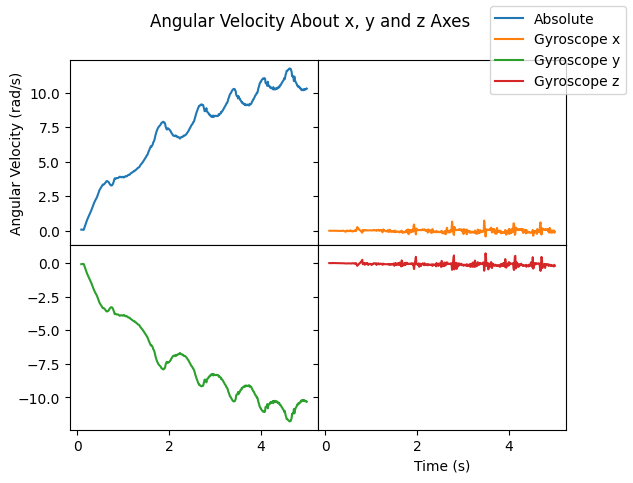

In [48]:
# 4-Sectioned Plot:

fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Angular Velocity About x, y and z Axes')

ax1.plot(data_trimmed.index, data_trimmed['Absolute (rad/s)'], 'tab:blue', label='Absolute')
ax2.plot(data_trimmed.index, data_trimmed['Gyroscope x (rad/s)'], 'tab:orange', label='Gyroscope x')
ax3.plot(data_trimmed.index, data_trimmed['Gyroscope y (rad/s)'], 'tab:green', label='Gyroscope y')
ax4.plot(data_trimmed.index, data_trimmed['Gyroscope z (rad/s)'], 'tab:red', label='Gyroscope z')

ax1.set_ylabel('Angular Velocity (rad/s)')
ax4.set_xlabel('Time (s)')

for ax in fig.get_axes():
    ax.label_outer()

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
fig.legend(lines + lines2 + lines3 + lines4, labels + labels2 + labels3 + labels4, loc='upper right')

##5. Error Propogation and Reporting

Finally, we can use the slope of this line $\alpha$ to calculate the acceleration due to gravity. We can also propogate error using the covariance matrix (pcov).

In [39]:
# Calculate g
m = 300 # g
alpha = alpha_fit # rad/s^2
R = 11.7 # cm
I = 10661 # g cm^2
theta = 2 # degrees

g = (m * alpha * R + (I * alpha)/R) / (m * np.sin(np.radians(theta)))

# Calculate error
alpha_error, b_error = np.sqrt(np.diag(pcov))

g_error = (m * alpha_error * R + I * alpha_error) / (m * np.sin(np.radians(theta)))

# Convert from cm/s^2 to m/s^2 and get rid of - signs.
g = np.abs(g / 100)
g_error = np.abs(g_error / 100)

print('Final Result:')
print(f'g = {g:.3f} +/- {g_error:.3f} m/s^2')

Final Result:
g = 8.551 +/- 0.375 m/s^2


As you can see, the final result isn't perfect, but it is somewhat close to the accepted value of $g=$ 9.8 m/s^2. A likely source of error was the imperfect design of my rolling apparatus, as on the plot of angular velocity you could see a jolt of acceleration each time a full revolution was completed, likely due to the surface not being perfectly curved. Another source of error was the phone not rolling perfectly straight, since it sometimes veered off to the side a bit.